In [2]:
import drawSvg as draw
from copy import deepcopy

DRAWING_HEIGHT = 4
DRAWING_WIDTH = 7

digit_height = 3.5
digit_width = 1.25
digit_spacing = 0.33
segment_spacing = 0.03
segment_thickness = 0.2

horizontal_segment_width = digit_width - (2 * segment_spacing) - (2 * segment_thickness)
vertical_segment_height = (digit_height - segment_thickness - (2 * segment_spacing)) / 2

# Vertical distance between colon segments
colon_vertical_distance = 0.7
# Spacing to the left and right of the colon
colon_horizontal_margin = 0.4

drawing = draw.Drawing(
    DRAWING_WIDTH, DRAWING_HEIGHT, stroke_width=0.01, stroke="black", fill="none"
)

segments = {
    "a": {'shape': draw.Rectangle(
        segment_thickness + segment_spacing,
        digit_height - segment_thickness,
        horizontal_segment_width,
        segment_thickness,
    )},
    "b": {'shape': draw.Rectangle(
        digit_width - segment_thickness,
        digit_height - vertical_segment_height,
        segment_thickness,
        vertical_segment_height,
    )},
    "c": {'shape': draw.Rectangle(
        digit_width - segment_thickness, 0, segment_thickness, vertical_segment_height
    )},
    "d": {'shape': draw.Rectangle(
        segment_thickness + segment_spacing,
        0,
        horizontal_segment_width,
        segment_thickness,
    )},
    "e": {'shape': draw.Rectangle(0, 0, segment_thickness, vertical_segment_height)},
    "f": {'shape': draw.Rectangle(
        0,
        digit_height - vertical_segment_height,
        segment_thickness,
        vertical_segment_height,
    )},
    "g": {'shape': draw.Rectangle(
        0, vertical_segment_height + segment_spacing, digit_width, segment_thickness
    )},
}

first_digit = draw.Group()
first_digit.extend([segments["b"]['shape'], segments["c"]['shape']])

full_digit = draw.Group()
full_digit.extend([s['shape'] for s in segments.values()])

colon = draw.Group()
colon.extend(
    [
        draw.Rectangle(0, 0, segment_thickness, segment_thickness),
        draw.Rectangle(
            0,
            colon_vertical_distance + segment_thickness,
            segment_thickness,
            segment_thickness,
        ),
    ]
)

vertical_segment_pad = draw.Group()
vertical_segment_pad.extend([
    draw.Line(-segment_spacing, digit_height - trace_width/2, segment_thickness, digit_height - trace_width/2, stroke='red', stroke_width=trace_width),
    draw.Line(
        -segment_spacing - PAD_LENGTH, digit_height - PAD_WIDTH/2, -segment_spacing, digit_height - PAD_WIDTH/2, stroke='red', stroke_width=PAD_WIDTH
    ),
])


display = draw.Group()
horizontal_offset = 0
for d in (first_digit, full_digit, colon, full_digit, full_digit):
    if d is colon:
        colon.args["transform"] = "translate({} {})".format(
            # Horizontal offset
            horizontal_offset + colon_horizontal_margin - digit_spacing,
            # Vertical center
            -(digit_height / 2)
            + ((colon_vertical_distance + (2 * segment_thickness)) / 2),
        )

        horizontal_offset += (
            segment_thickness - digit_spacing + (colon_horizontal_margin * 2)
        )
    else:
        d = deepcopy(d)
        d.args["transform"] = f"translate({horizontal_offset} 0)"
        # Common-digit traces
        trace_width = 0.05
        trace_spacing = 0.05
        p = draw.Path(stroke_width=trace_thickness, stroke='red')
        p.M((horizontal_offset + segment_thickness + segment_spacing + horizontal_segment_width) - (trace_width /2), 0)
        p.v(vertical_segment_height - (trace_width/2))
        p.h(segment_spacing + segment_thickness + (trace_width / 2))
        p.H(horizontal_offset +(trace_width / 2))
        p.v(segment_spacing*2 + segment_thickness + (trace_width))
        p.h(digit_width - trace_width/2)
        p.M(horizontal_offset + segment_thickness + segment_spacing + trace_thickness/2, vertical_segment_height + segment_spacing*2 + segment_thickness)
        p.v(vertical_segment_height)
        p.h
        drawing.append(p)
        horizontal_offset += digit_width + digit_spacing
        PAD_WIDTH = 0.125
        PAD_LENGTH = 0.25
        
        # Common segment traces/pads



        
        
    display.append(d)

drawing.append(display)



drawing.setPixelScale(120)
drawing.saveSvg('clock_face.svg')
drawing






NameError: name 'trace_width' is not defined

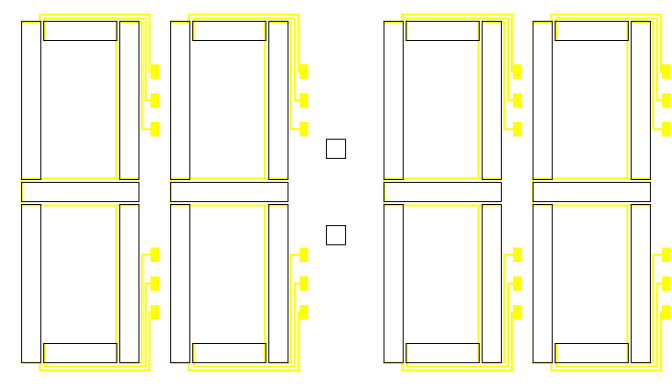

In [3]:
import drawSvg as draw
from copy import deepcopy

DRAWING_HEIGHT = 4
DRAWING_WIDTH = 7

digit_height = 3.556
digit_width = 1.2224
digit_spacing = 0.33
segment_spacing = 0.03
segment_thickness = 0.2


verticle_segment_height = (digit_height - segment_thickness - (2 * segment_spacing))/2
horizontal_segment_width =  digit_width - (2 * segment_spacing) - (2 * segment_thickness)

d = draw.Drawing(DRAWING_WIDTH, DRAWING_HEIGHT, stroke_width=.01, stroke='black', fill='none')

right_pos_offset = segment_thickness + horizontal_segment_width + (2 * segment_spacing)
top_pos_offset = verticle_segment_height + segment_thickness + (segment_spacing * 2)
horizonal_segment_left_offset = segment_thickness + segment_spacing



p = draw.Path(stroke_width=trace_thickness, stroke='yellow')
p.M(digit_width, verticle_segment_height - (trace_thickness/2))
p.H(0)
p.v(trace_thickness + (segment_spacing*2) + segment_thickness)
p.h(digit_width)
p.M(digit_width - segment_spacing - (trace_thickness/2) - segment_thickness, verticle_segment_height)
p.v(-verticle_segment_height)
p.M(digit_width - segment_spacing - (trace_thickness/2) - segment_thickness, top_pos_offset)
p.v(verticle_segment_height)

p2 = draw.Path(stroke_width=trace_thickness, stroke='yellow')
p2.M(right_pos_offset, digit_height - (trace_thickness/2))
p2.h(segment_thickness + (trace_thickness * 1.5))

p3 = draw.Path(stroke_width=trace_thickness, stroke='yellow')
p3.M(segment_thickness + segment_spacing + (trace_thickness/2), digit_height - segment_thickness)
p3.v(segment_thickness + segment_spacing + (trace_thickness/2))
p3.h(horizontal_segment_width + segment_thickness + (segment_spacing * 3.5) + (trace_thickness/2))
p3.v(-(verticle_segment_height / 2))

p4 = draw.Path(stroke_width=trace_thickness, stroke='yellow')
p4.M(0, digit_height - (trace_thickness/2))
p4.h(segment_thickness)
p4.v(segment_spacing * 3)


pads = []
for i in range(-1, 2):
    p5 = draw.Path(stroke_width=digit_spacing - (trace_thickness * 12), stroke='yellow')
    p5.M(
        digit_width + (digit_spacing/2), 
        (i * pad_length * 2) + digit_height - (verticle_segment_height /2) - (pad_length/2)
    )
    p5.v(pad_length)
    pads.append(p5)
    
    
    
    p5 = draw.Path(stroke_width=digit_spacing - (trace_thickness * 12), stroke='yellow')
    p5.M(digit_width + (digit_spacing/2), 
         (i * pad_length * 2) + (verticle_segment_height / 2) - (pad_length/2))
         
    p5.v(pad_length)
    pads.append(p5)
    
    p5 = draw.Path(stroke_width=trace_thickness, stroke='yellow')
    p5.M(
        digit_width + (digit_spacing/2), 
        (i * pad_length * 2) + digit_height - (verticle_segment_height / 2)
    )
    p5.h(-(digit_spacing/2) + (trace_thickness * 1.5) + (trace_thickness * (i+1) * 2))
    p5.V(digit_height + (trace_thickness * (i+1) * 2) - (trace_thickness/2))
    if i == -1:
        p5.h(-trace_thickness - segment_thickness)
    if i == 0:
        p5.h((-trace_thickness*3) - horizontal_segment_width - segment_thickness - segment_spacing)
        p5.v(-segment_thickness - (trace_thickness * 2))

    if i == 1:
        p5.h((-trace_thickness*6) - segment_thickness - (segment_spacing*2) - horizontal_segment_width)
        p5.v(-trace_thickness*4)
        p5.h(-segment_thickness)
        
    pads.append(p5)
    
    p5 = draw.Path(stroke_width=trace_thickness, stroke='yellow')
    p5.M(
        digit_width + (digit_spacing/2), 
        (i * pad_length * 2) + (verticle_segment_height / 2)\
    )
    p5.h(-(digit_spacing/2) + (trace_thickness * 1.5) + (trace_thickness * (2 - (i+1)) * 2))
    p5.V(0 - (trace_thickness * (2 - (i+1)) * 2))
    pads.append(p5)

    if i == 1:
        p5.h(-trace_thickness - segment_thickness)
    if i == 0:
        p5.h((-trace_thickness*3) - horizontal_segment_width - segment_thickness - segment_spacing)
        p5.v(segment_thickness + (trace_thickness * 2))

    if i == -1:
        p5.h((-trace_thickness*6) - segment_thickness - (segment_spacing*2) - horizontal_segment_width)
        p5.v(trace_thickness*4)
        p5.h(-segment_thickness)
        
        
    

    



segment_group = draw.Group()
segment_group.extend([
    p, *pads,
    
    draw.Rectangle(0, 0, segment_thickness, verticle_segment_height),
    draw.Rectangle(right_pos_offset, 0, segment_thickness, verticle_segment_height),


    draw.Rectangle(0, top_pos_offset, segment_thickness, verticle_segment_height),
    
    draw.Rectangle(right_pos_offset, top_pos_offset, segment_thickness, verticle_segment_height),
    
    draw.Rectangle(horizonal_segment_left_offset, 0, horizontal_segment_width, segment_thickness),
    draw.Rectangle(
        horizonal_segment_left_offset, top_pos_offset + verticle_segment_height
        - segment_thickness, horizontal_segment_width, segment_thickness
    ),
    
    draw.Rectangle(0, verticle_segment_height + segment_spacing, digit_width, segment_thickness),    


])

digit_trace_group = draw.Group()





colon_distance = 0.7
colon_horizontal_margin = 0.4

colon_group = draw.Group()
colon_group.height = colon_distance + (2 * segment_thickness)
colon_group.extend([
    draw.Rectangle(0, 0, segment_thickness, segment_thickness),
    draw.Rectangle(0, colon_distance + segment_thickness, segment_thickness, segment_thickness),
])

digit_1_x_offset = 0
digit_2_x_offset = digit_width + digit_spacing
colon_x_offset = (digit_2_x_offset + digit_width
                  + colon_horizontal_margin)
digit_3_x_offset = segment_thickness + colon_x_offset + colon_horizontal_margin
digit_4_x_offset = digit_3_x_offset + digit_width + digit_spacing

digit_one = deepcopy(segment_group)
digit_two = deepcopy(segment_group)
digit_two.args['transform'] = f"translate({digit_2_x_offset} 0)"
colon_group.args['transform'] = "translate({} {})".format(
    colon_x_offset,
    -(digit_height / 2) + (colon_group.height / 2)
)
digit_three = deepcopy(segment_group)
digit_three.args['transform'] = f"translate({digit_3_x_offset} 0)"
digit_four = deepcopy(segment_group)
digit_four.args['transform'] = f"translate({digit_4_x_offset} 0)"

display_group = draw.Group()
display_group.extend([
    digit_one,
    digit_two,
    colon_group,
    digit_three,
    digit_four
])

display_group.args['transform'] = "translate({} {})".format(
    (DRAWING_WIDTH - (digit_4_x_offset + digit_width)) / 2,
    -((DRAWING_HEIGHT - digit_height) / 2)
)

# d.append(colon_group)
d.append(display_group)

d.setPixelScale(96)  # Set number of pixels per geometry unit
d.saveSvg('clock_face.svg')
# Display in iPython notebook
d.rasterize()  # Display as PNG
d  # Display as SVG
